In [1]:
pip install -U vnstock

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install ta

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install keras-self-attention

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: keras-self-attention in c:\users\nhatk\appdata\local\programs\python\python312\lib\site-packages (0.51.0)




[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
from ta.momentum import RSIIndicator
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, RNN, concatenate
from tensorflow.keras.optimizers import RMSprop
from vnstock import *
from ta.volatility import BollingerBands
from tensorflow.keras.layers import Layer
import tensorflow as tf
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, Flatten, BatchNormalization
from sklearn.model_selection import RandomizedSearchCV
# from scikeras.wrappers import KerasClassifier

from ta.momentum import StochasticOscillator
from ta.volume import OnBalanceVolumeIndicator
from ta.trend import CCIIndicator
from sklearn.preprocessing import StandardScaler
from ta.volume import ChaikinMoneyFlowIndicator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import regularizers
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.saving import register_keras_serializable
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [8]:
from vnstock import *
import pandas as pd
import os
from collections import Counter
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.metrics import log_loss

In [12]:
from xgboost import XGBClassifier

In [13]:
import optuna

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [14]:
import joblib

In [15]:
def dataframe_to_x_y(df, feature, target):
  X_train, y_train = [], []
  X_val, y_val = [], []
  n = len(df)
  split_index = int(n * 0.8)
  X_train = df[feature][:split_index]
  y_train = df[target][:split_index]
  X_val = df[feature][split_index:]
  y_val = df[target][split_index:]
  return X_train, y_train, X_val, y_val

In [16]:
sentiment_feature_selected = [
    'Investor Sentiment', 'time_distance_from_sa_to_close_minutes', 'mean_sentiment_norm',
    'time_distance_from_sa_to_close_minutes_p1d', 'company_communication_p1d',
    'Company Communication', 'Price Action', 'reputation_p1d', 'Financial',
    'std_sentiment_score', 'std_sentiment_score_p1d', 
    'risks_p1d', 'Sales', 'Volatility', 'conditions_p1d', 'Technical Analysis',
    'Strategy', 'strategy_p1d', 'sum_positive_sa', 'Signal', 'mean_sentiment_norm_p1d'
]

ta_fa_feature_selected = [
    'roc_vn30', 'volume_ma_vn30', 'bb_bbh_bb_bbl_ratio', '%K_vni', 'bb_bbp_vn30', 'roc_5', 'obv_vni', 'roc_vni',
    'rsi_vni', 'ema_26_vni', 'volume_to_volume_ma_ratio_vni', 'rsi_vn30', 'z_score_5d', 'sma_50_vn30',
    'rsi_rsi_base_ma_ratio_vn30', 'bb_bbh_vni', 'volume_ma_vni', 'bb_bbp_vni', 'volume_to_volume_ma_ratio_vn30',
    'cci_vni', 'bb_bbl_vni', '%K_vn30', 'bb_bbl', 'rsi_base_ma_vn30', 'obv_vn30', 'rsi_rsi_base_ma_ratio_vni',
    'distance_to_nearest_quarter', 'cci_vn30', 'ema_12_vn30', 'rsi_base_ma_vni', 'sharpe_like_5d', 'ema_12_vni', 'sma_50_vni',
    'macd', 'annual_return', 'bb_bbh_vn30', 'sma_20_vn30', 'ema_26_vn30', 'bb_bbl_vn30', 'sma_20_vni'
]
features = ta_fa_feature_selected + sentiment_feature_selected
target = 'target'
scaler = StandardScaler()

In [17]:
def load_data_for_analysis(tickers, folder_path):

    df_all = []

    for ticker in tickers:
        file_path = os.path.join(folder_path, f"{ticker}.xlsx")
        if os.path.exists(file_path):
            df = pd.read_excel(file_path)
            df["ticker"] = ticker  # thêm cột ticker
            df_all.append(df)
        else:
            print(f"⚠️ Không tìm thấy: {file_path}")

    # Gộp lại thành 1 DataFrame
    df_global = pd.concat(df_all, ignore_index=True)
    print(f"✅ Đã load xong {len(df_global)} dòng dữ liệu từ {len(df_all)} cổ phiếu.")
    return df_global

In [18]:
tickers = ['ACB', 'BCM', 'BID','BVH','CTG','FPT','GAS','GVR','HDB','HPG',
                    'LPB','MBB','MSN','MWG','PLX','SAB','SHB','SSB','SSI','STB',
                    'TCB','TPB','VCB','VHM','VIB','VIC','VJC','VNM','VPB','VRE']
folder_path_train = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v5\stock_trend\train_data" 
folder_path_test = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v5\stock_trend\test_data" 
df_global_train = load_data_for_analysis(tickers, folder_path_train)
df_global_test = load_data_for_analysis(tickers, folder_path_test)


✅ Đã load xong 35928 dòng dữ liệu từ 30 cổ phiếu.
✅ Đã load xong 7380 dòng dữ liệu từ 30 cổ phiếu.


In [19]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [20]:
from sklearn.metrics import (
    f1_score, accuracy_score, classification_report, roc_auc_score,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize

In [21]:
def evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, model_dict):

    f1_weighted_scores = []
    f1_micro_scores = []
    acc_scores = []
    auc_scores = []
    model_names = list(model_dict.keys())

    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    roc_data = {}

    for name in model_names:
        base_model = model_dict[name]
        model_class = base_model.__class__
        model_params = base_model.get_params()
        model = model_class(**model_params)

        # Cross-validation F1 weighted
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
        print(f"{name} CV F1 (weighted): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)

        # F1 Scores
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        f1_micro = f1_score(y_test, y_pred, average='micro')
        acc = accuracy_score(y_test, y_pred)

        print(f"{name} Test F1 (weighted): {f1_weighted:.4f}")
        print(f"{name} Test F1 (micro)   : {f1_micro:.4f}")
        print(f"{name} Test Accuracy     : {acc:.4f}")
        print(classification_report(y_test, y_pred))

        try:
            roc_auc = roc_auc_score(y_test_bin, y_proba, average='micro', multi_class='ovr')
            print(f"{name} ROC AUC (micro ovr): {roc_auc:.4f}")
        except ValueError:
            print(f"{name} ROC AUC could not be computed (possibly due to only one class present in y_test)")
            roc_auc = np.nan

        # Lưu dữ liệu để vẽ
        fpr = {}
        tpr = {}
        roc_auc_class = {}
        for i, cls in enumerate(classes):
            fpr[cls], tpr[cls], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc_class[cls] = auc(fpr[cls], tpr[cls])
        roc_data[name] = {"fpr": fpr, "tpr": tpr, "auc": roc_auc_class}

        # Lưu điểm số
        f1_weighted_scores.append(f1_weighted)
        f1_micro_scores.append(f1_micro)
        acc_scores.append(acc)
        auc_scores.append(roc_auc)

    return model_names, f1_weighted_scores, f1_micro_scores, acc_scores, auc_scores, roc_data


In [22]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}

In [23]:
X_train_no_sa = df_global_train[ta_fa_feature_selected]
X_test_no_sa = df_global_test[ta_fa_feature_selected]
y_train = df_global_train[target]
y_test = df_global_test[target]

In [24]:
print("Đánh giá với bộ feature không có SA (chỉ ta + fa)")
scaler = StandardScaler()
X_train_no_sa_scaled = scaler.fit_transform(X_train_no_sa)
X_test_no_sa_scaled = scaler.transform(X_test_no_sa)      

model_names, f1_weighted_scores_no_sa, f1_micro_scores_no_sa, acc_scores_no_sa, auc_scores_no_sa, roc_data_no_sa = evaluate_models(X_train_no_sa_scaled, X_test_no_sa_scaled, y_train, y_test, models)

Đánh giá với bộ feature không có SA (chỉ ta + fa)
Random Forest CV F1 (weighted): 0.5960 ± 0.0139
Random Forest Test F1 (weighted): 0.5191
Random Forest Test F1 (micro)   : 0.6259
Random Forest Test Accuracy     : 0.6259
              precision    recall  f1-score   support

           0       0.31      0.05      0.09      1302
           1       0.64      0.96      0.77      4656
           2       0.39      0.05      0.09      1422

    accuracy                           0.63      7380
   macro avg       0.45      0.36      0.32      7380
weighted avg       0.54      0.63      0.52      7380

Random Forest ROC AUC (micro ovr): 0.7517
XGBoost CV F1 (weighted): 0.5816 ± 0.0181


[10:14:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5227
XGBoost Test F1 (micro)   : 0.6005
XGBoost Test Accuracy     : 0.6005
              precision    recall  f1-score   support

           0       0.25      0.05      0.08      1302
           1       0.65      0.90      0.75      4656
           2       0.27      0.12      0.17      1422

    accuracy                           0.60      7380
   macro avg       0.39      0.36      0.34      7380
weighted avg       0.51      0.60      0.52      7380

XGBoost ROC AUC (micro ovr): 0.7511
LightGBM CV F1 (weighted): 0.5750 ± 0.0166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10038
[LightGBM] [Info] Number of data points in the train set: 35928, number of used features: 40
[LightGBM] [Info] Start training from score -1.439218
[LightGBM] [Info] Start training from score -0.680370
[LightGBM] [Info] Start training from

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5140
AdaBoost Test F1 (micro)   : 0.6194
AdaBoost Test Accuracy     : 0.6194
              precision    recall  f1-score   support

           0       0.14      0.01      0.02      1302
           1       0.64      0.95      0.77      4656
           2       0.30      0.09      0.13      1422

    accuracy                           0.62      7380
   macro avg       0.36      0.35      0.31      7380
weighted avg       0.49      0.62      0.51      7380

AdaBoost ROC AUC (micro ovr): 0.7493


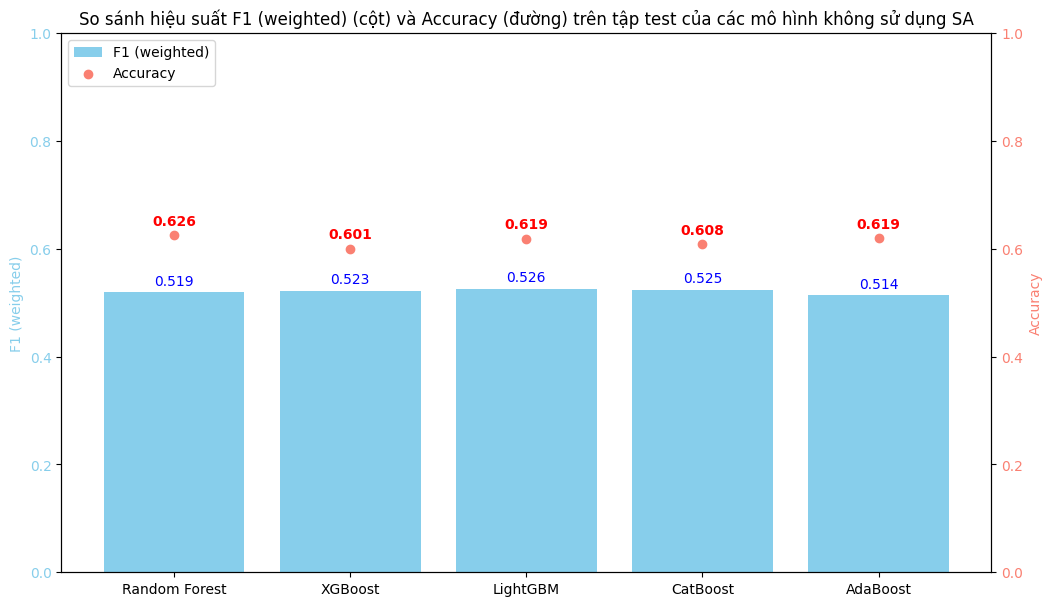

In [25]:
x = np.arange(len(model_names))  # vị trí trục x

fig, ax1 = plt.subplots(figsize=(12, 7))

# Vẽ biểu đồ cột cho F1
bars = ax1.bar(x, f1_weighted_scores_no_sa, color='skyblue', label='F1 (weighted)')
ax1.set_ylabel('F1 (weighted)', color='skyblue')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.tick_params(axis='y', labelcolor='skyblue')

# Tạo trục y phụ để vẽ Accuracy (nếu muốn)
ax2 = ax1.twinx()  
ax2.scatter(x, acc_scores_no_sa, color='salmon', label='Accuracy')
ax2.set_ylabel('Accuracy', color='salmon')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y', labelcolor='salmon')

# Thêm tiêu đề và legend
plt.title("So sánh hiệu suất F1 (weighted) (cột) và Accuracy (đường) trên tập test của các mô hình không sử dụng SA")

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

# Hiển thị giá trị F1 trên cột bar
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.3f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='blue')

# Hiển thị giá trị Accuracy trên từng điểm đường line
for i, acc_value in enumerate(acc_scores_no_sa):
    ax2.annotate(f'{acc_value:.3f}',
                 xy=(x[i], acc_value),
                 xytext=(0, 5),  # dời lên trên 5 points cho rõ
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red',
                 fontsize=10,
                 fontweight='bold')

plt.show()

In [26]:
X_train_with_sa = df_global_train[features]  # features = ta + fa + sa
X_test_with_sa = df_global_test[features]
y_train = df_global_train[target]
y_test = df_global_test[target]

scaler = StandardScaler()
X_train_with_sa_scaled = scaler.fit_transform(X_train_with_sa)   # Fit scaler trên train, scale train luôn
X_test_with_sa_scaled = scaler.transform(X_test_with_sa)  

In [27]:
# Đánh giá với bộ feature có SA (ta + fa + sa)
print("Đánh giá với bộ feature có SA (chỉ ta + fa +sa)")
X_train_with_sa = df_global_train[features]  # features = ta + fa + sa
X_test_with_sa = df_global_test[features]

scaler = StandardScaler()
X_train_with_sa_scaled = scaler.fit_transform(X_train_with_sa)   # Fit scaler trên train, scale train luôn
X_test_with_sa_scaled = scaler.transform(X_test_with_sa)  

model_names, f1_weighted_scores_with_sa, f1_micro_scores_with_sa, acc_scores_with_sa, auc_scores_with_sa, roc_data_with_sa = evaluate_models(X_train_with_sa_scaled, X_test_with_sa_scaled, y_train, y_test, models)

Đánh giá với bộ feature có SA (chỉ ta + fa +sa)
Random Forest CV F1 (weighted): 0.5976 ± 0.0145
Random Forest Test F1 (weighted): 0.5392
Random Forest Test F1 (micro)   : 0.6275
Random Forest Test Accuracy     : 0.6275
              precision    recall  f1-score   support

           0       0.35      0.10      0.15      1302
           1       0.65      0.94      0.77      4656
           2       0.38      0.08      0.13      1422

    accuracy                           0.63      7380
   macro avg       0.46      0.37      0.35      7380
weighted avg       0.55      0.63      0.54      7380

Random Forest ROC AUC (micro ovr): 0.7617
XGBoost CV F1 (weighted): 0.6042 ± 0.0159


[10:18:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5629
XGBoost Test F1 (micro)   : 0.6364
XGBoost Test Accuracy     : 0.6364
              precision    recall  f1-score   support

           0       0.38      0.07      0.12      1302
           1       0.67      0.93      0.78      4656
           2       0.39      0.19      0.25      1422

    accuracy                           0.64      7380
   macro avg       0.48      0.40      0.39      7380
weighted avg       0.57      0.64      0.56      7380

XGBoost ROC AUC (micro ovr): 0.7731
LightGBM CV F1 (weighted): 0.5952 ± 0.0125
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12003
[LightGBM] [Info] Number of data points in the train set: 35928, number of used features: 61
[LightGBM] [Info] Start training from score -1.439218
[LightGBM] [Info] Start tra

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5449
AdaBoost Test F1 (micro)   : 0.6243
AdaBoost Test Accuracy     : 0.6243
              precision    recall  f1-score   support

           0       0.30      0.10      0.14      1302
           1       0.66      0.93      0.77      4656
           2       0.38      0.11      0.17      1422

    accuracy                           0.62      7380
   macro avg       0.45      0.38      0.36      7380
weighted avg       0.54      0.62      0.54      7380

AdaBoost ROC AUC (micro ovr): 0.7697


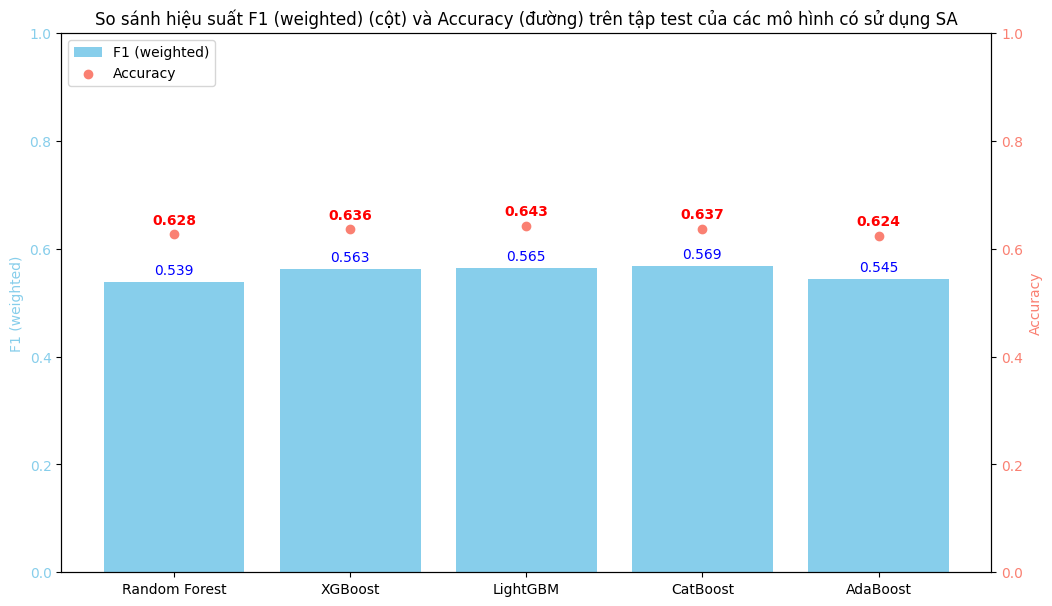

In [28]:
x = np.arange(len(model_names))  # vị trí trục x

fig, ax1 = plt.subplots(figsize=(12, 7))

# Vẽ biểu đồ cột cho F1
bars = ax1.bar(x, f1_weighted_scores_with_sa, color='skyblue', label='F1 (weighted)')
ax1.set_ylabel('F1 (weighted)', color='skyblue')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.tick_params(axis='y', labelcolor='skyblue')

# Tạo trục y phụ để vẽ Accuracy (nếu muốn)
ax2 = ax1.twinx()  
ax2.scatter(x, acc_scores_with_sa, color='salmon', label='Accuracy')
ax2.set_ylabel('Accuracy', color='salmon')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y', labelcolor='salmon')

# Thêm tiêu đề và legend
plt.title("So sánh hiệu suất F1 (weighted) (cột) và Accuracy (đường) trên tập test của các mô hình có sử dụng SA")

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

# Hiển thị giá trị F1 trên cột bar
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.3f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='blue')

# Hiển thị giá trị Accuracy trên từng điểm đường line
for i, acc_value in enumerate(acc_scores_with_sa):
    ax2.annotate(f'{acc_value:.3f}',
                 xy=(x[i], acc_value),
                 xytext=(0, 5),  # dời lên trên 5 points cho rõ
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red',
                 fontsize=10,
                 fontweight='bold')

plt.show()

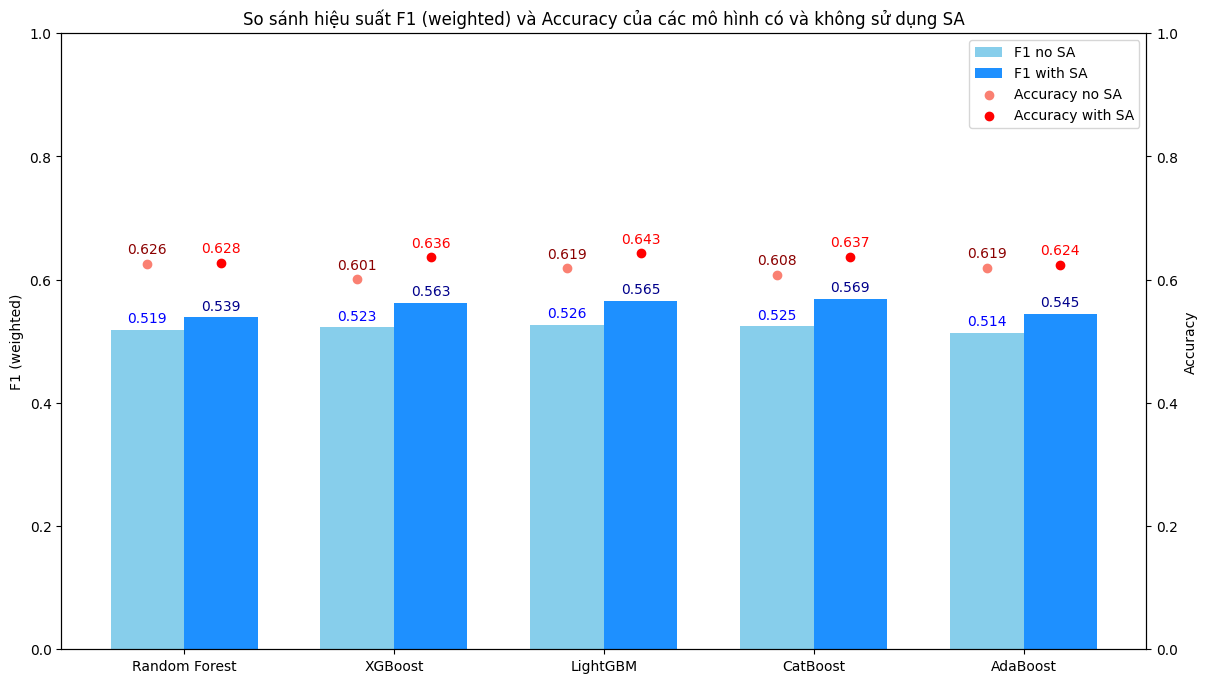

In [29]:
# Vẽ biểu đồ so sánh F1 và Accuracy giữa 2 bộ feature
x = np.arange(len(model_names))  # vị trí trục x
width = 0.35  # độ rộng cột

fig, ax1 = plt.subplots(figsize=(14, 8))

# Cột F1 no_sa và with_sa
bars1 = ax1.bar(x - width/2, f1_weighted_scores_no_sa, width, label='F1 no SA', color='skyblue')
bars2 = ax1.bar(x + width/2, f1_weighted_scores_with_sa, width, label='F1 with SA', color='dodgerblue')
ax1.set_ylabel('F1 (weighted)')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Trục y phụ cho Accuracy
ax2 = ax1.twinx()
line1 = ax2.scatter(x - width/2, acc_scores_no_sa, color='salmon', label='Accuracy no SA')
line2 = ax2.scatter(x + width/2, acc_scores_with_sa, color='red', label='Accuracy with SA')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y')

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper right')

# Hiển thị giá trị trên từng cột bar và điểm line
def annotate_bars(bars, ax, color='black'):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color=color)

annotate_bars(bars1, ax1, 'blue')
annotate_bars(bars2, ax1, 'darkblue')

for i in range(len(x)):
    ax2.annotate(f'{acc_scores_no_sa[i]:.3f}',
                 xy=(x[i] - width/2, acc_scores_no_sa[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='darkred')
    ax2.annotate(f'{acc_scores_with_sa[i]:.3f}',
                 xy=(x[i] + width/2, acc_scores_with_sa[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red')

plt.title("So sánh hiệu suất F1 (weighted) và Accuracy của các mô hình có và không sử dụng SA")
plt.show()

In [ ]:
# ==============================================Tuning with create_dmvs_validation_set and loss ===============================================

In [32]:
# Với train_df
df_global_train['has_SA'] = (df_global_train[sentiment_feature_selected].abs().sum(axis=1) > 0).astype(int)

# Với test_df
df_global_test['has_SA'] = (df_global_test[sentiment_feature_selected].abs().sum(axis=1) > 0).astype(int)

In [38]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

def create_dmvs_validation_set(train_df, test_df, target_col='target', sa_col='has_SA', val_size=0.15, random_state=42):
    # Tạo cột phân tầng (stratification key)
    train_df = train_df.copy()
    test_df = test_df.copy()
    train_df['strata'] = train_df[target_col].astype(str) + "_" + train_df[sa_col].astype(str)
    test_df['strata'] = test_df[target_col].astype(str) + "_" + test_df[sa_col].astype(str)

    # Phân phối trong test
    test_dist = test_df['strata'].value_counts(normalize=True)

    # Lấy chỉ các strata có trong cả train và test
    common_strata = set(test_dist.index) & set(train_df['strata'].unique())
    train_df = train_df[train_df['strata'].isin(common_strata)]
    
    # Tạo stratified split
    sss = StratifiedShuffleSplit(n_splits=1, test_size=val_size, random_state=random_state)
    for train_idx, val_idx in sss.split(train_df, train_df['strata']):
        new_train_df = train_df.iloc[train_idx].drop(columns=['strata'])
        val_df = train_df.iloc[val_idx].drop(columns=['strata'])

    return new_train_df, val_df

In [39]:
new_train_df, val_df = create_dmvs_validation_set(
    df_global_train, df_global_test,
    target_col='target',  # thay bằng tên cột nhãn thật
    sa_col='has_SA',
    val_size=0.15
)

In [40]:
new_train_df.shape

(30538, 306)

In [36]:
df_global_train.shape

(35928, 306)

In [41]:
val_df.shape

(5390, 306)

In [43]:
import pandas as pd
import numpy as np
from scipy.special import rel_entr
import matplotlib.pyplot as plt

def compare_distribution(val_df, test_df, target_col='target', sa_col='has_SA', top_k=20):
    # Tạo cột strata
    val_strata = val_df[target_col].astype(str) + "_" + val_df[sa_col].astype(str)
    test_strata = test_df[target_col].astype(str) + "_" + test_df[sa_col].astype(str)

    # Tính phân phối theo strata
    val_dist = val_strata.value_counts(normalize=True).sort_index()
    test_dist = test_strata.value_counts(normalize=True).sort_index()

    # Gộp hai phân phối
    dist_df = pd.DataFrame({
        'val_dist': val_dist,
        'test_dist': test_dist
    }).fillna(0)

    # Tính chênh lệch tuyệt đối và KL divergence
    dist_df['abs_diff'] = (dist_df['val_dist'] - dist_df['test_dist']).abs()
    kl_div = np.sum(rel_entr(dist_df['val_dist'], dist_df['test_dist'] + 1e-12))  # thêm epsilon để tránh log(0)

    # In KL divergence
    print(f"✅ KL-divergence between val and test: {kl_div:.6f}")
    
    # Hiển thị các strata có sự khác biệt lớn nhất
    print(f"\nTop {top_k} strata có sự khác biệt lớn nhất:")
    display(dist_df.sort_values('abs_diff', ascending=False).head(top_k))

    # Vẽ biểu đồ phân phối
    dist_df[['val_dist', 'test_dist']].sort_values('val_dist', ascending=False).head(top_k).plot(
        kind='bar', figsize=(14, 6), alpha=0.8
    )
    plt.title(f"So sánh phân phối top {top_k} strata giữa Validation và Test")
    plt.ylabel("Tỷ lệ xuất hiện")
    plt.xlabel("Strata (target_has_SA)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return dist_df


✅ KL-divergence between val and test: 0.040336

Top 20 strata có sự khác biệt lớn nhất:


,val_dist,test_dist,abs_diff
1_0,0.319481,0.444851,0.125370
2_1,0.131169,0.089973,0.041196
0_1,0.117069,0.080081,0.036987
0_0,0.120037,0.096341,0.023696
2_0,0.125232,0.102710,0.022522
1_1,0.187013,0.186043,0.000970


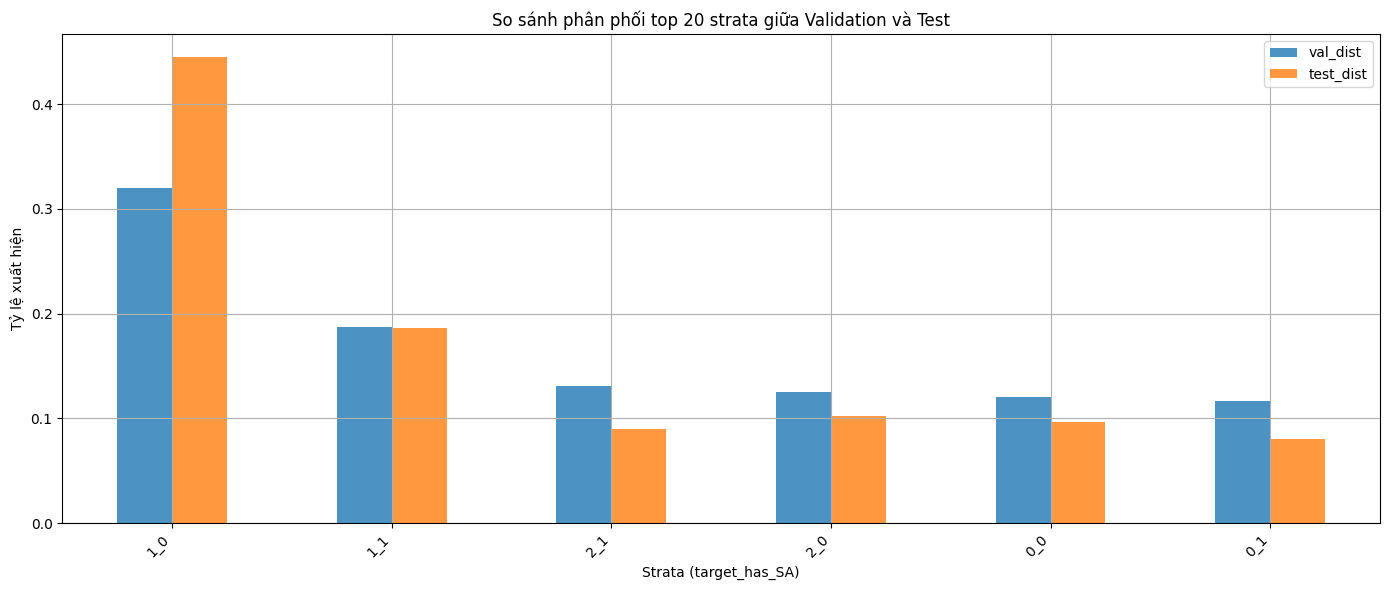

In [44]:
# Giả sử bạn đã có val_df và df_global_test
dist_df = compare_distribution(val_df, df_global_test, target_col='target', sa_col='has_SA', top_k=20)


In [57]:
scaler = StandardScaler()
X_train_new = new_train_df[features]
y_train_new = new_train_df[target]
X_train_new_scaler = scaler.fit_transform(X_train_new)

X_val = val_df[features]
y_val = val_df[target]
X_val_scaler = scaler.transform(X_val)


In [ ]:
def objective(trial):
    params = {
        "n_estimators": 1000,
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "use_label_encoder": False,
        "eval_metric": "mlogloss",
        "random_state": 42,
    }

    model = XGBClassifier(**params)
    model.fit(X_train_new_scaler, y_train_new, eval_set=[(X_val_scaler, y_val)], verbose=False)
    preds_proba = model.predict_proba(X_val_scaler)
    loss = log_loss(y_val, preds_proba)
    return loss

In [47]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)
print("Best trial:", study.best_trial.params)

[I 2025-06-05 15:28:34,714] A new study created in memory with name: no-name-e9c12d29-89fd-4be2-aee5-afe92e1a60ac
[15:28:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[I 2025-06-05 15:29:00,000] Trial 0 finished with value: 3.1286305837148536 and parameters: {'max_depth': 6, 'learning_rate': 0.1170788648386071, 'subsample': 0.9795684507669653, 'colsample_bytree': 0.6557661208717701}. Best is trial 0 with value: 3.1286305837148536.
[15:29:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[I 2025-06-05 15:29:15,536] Trial 1 finished with value: 2.484528210645129 and parameters: {'max_depth': 4, 'learning_rate': 0.058070697489978014, 'subsample': 0.9346441023758245, 'colsample_bytree': 0.85

Best trial: {'max_depth': 9, 'learning_rate': 0.011632016671032095, 'subsample': 0.6860718729142917, 'colsample_bytree': 0.5959797122704581}


In [ ]:
best_trial_xgboot = {'max_depth': 9, 'learning_rate': 0.011632016671032095, 'subsample': 0.6860718729142917, 'colsample_bytree': 0.5959797122704581}

In [ ]:

xgb_model = XGBClassifier(
    n_estimators=1000,  # giữ nguyên như trong objective
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    **best_trial_xgboot
)

In [52]:
xgb_model.fit(X_train_with_sa_scaled, y_train)

[16:28:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5959797122704581, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.011632016671032095,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
y_pred_xgb = xgb_model.predict(X_test_with_sa_scaled)

In [54]:
print("🎯 Accuracy:", accuracy_score(y_test, y_pred_xgb))

🎯 Accuracy: 0.6491869918699187


In [55]:
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


📊 Confusion Matrix:
[[  83 1079  140]
 [  44 4468  144]
 [  58 1124  240]]


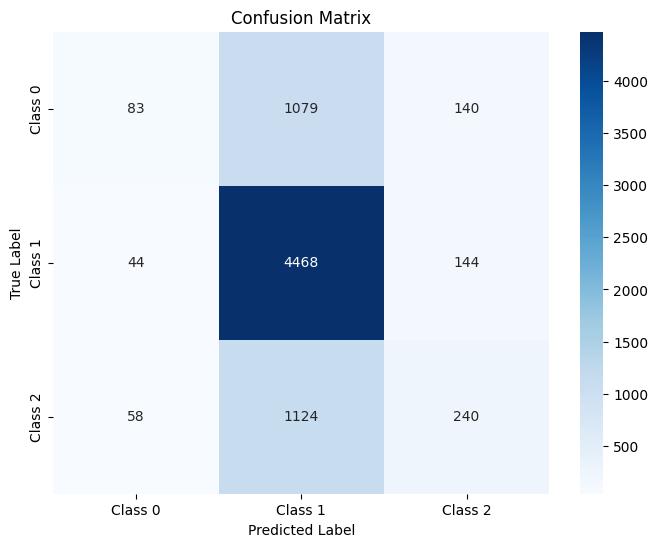

In [59]:
import seaborn as sns
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Nếu bạn có tên nhãn lớp, ví dụ:
class_names = ['Class 0', 'Class 1', 'Class 2']

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [56]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_xgb))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.06      0.11      1302
           1       0.67      0.96      0.79      4656
           2       0.46      0.17      0.25      1422

    accuracy                           0.65      7380
   macro avg       0.53      0.40      0.38      7380
weighted avg       0.59      0.65      0.56      7380



In [67]:
def objective_LGBMClassifier(trial):
    params = {
        "n_estimators": 1000,
        "max_depth": trial.suggest_int("max_depth", 5, 15),  # sâu hơn vì data lớn
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),  # thường học chậm
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 20, 100),  # min số mẫu ở lá cây
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),  # L1 regularization
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),  # L2 regularization
        "random_state": 42,
        "objective": "multiclass",
        "num_class": 3,
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
    }

    model = LGBMClassifier(**params)
    model.fit(
        X_train_new_scaler, y_train_new,
        eval_set=[(X_val_scaler, y_val)]
        # early_stopping_rounds=50,
        # verbose=False
    )
    
    preds_proba = model.predict_proba(X_val_scaler)
    loss = log_loss(y_val, preds_proba)
    return loss

In [68]:
study = optuna.create_study(direction="minimize")
study.optimize(objective_LGBMClassifier, n_trials=50)
print("Best trial:", study.best_trial.params)

[I 2025-06-05 17:00:33,198] A new study created in memory with name: no-name-fcbede04-6d39-4bc9-8de1-7b5fe14a85d9
[I 2025-06-05 17:00:46,199] Trial 0 finished with value: 0.8363775324941741 and parameters: {'max_depth': 5, 'learning_rate': 0.02611192396708811, 'subsample': 0.9892488512253431, 'colsample_bytree': 0.8580793806041354, 'min_child_samples': 47, 'reg_alpha': 0.6375053785188789, 'reg_lambda': 0.5458562342598965}. Best is trial 0 with value: 0.8363775324941741.
[I 2025-06-05 17:01:03,980] Trial 1 finished with value: 0.8217017369658881 and parameters: {'max_depth': 12, 'learning_rate': 0.03310757508678306, 'subsample': 0.9948459604915896, 'colsample_bytree': 0.65982221675433, 'min_child_samples': 54, 'reg_alpha': 0.7991120908329071, 'reg_lambda': 0.47173331231685545}. Best is trial 1 with value: 0.8217017369658881.
[I 2025-06-05 17:01:23,021] Trial 2 finished with value: 0.8488118018680283 and parameters: {'max_depth': 10, 'learning_rate': 0.07842422510693668, 'subsample': 0.7

Best trial: {'max_depth': 10, 'learning_rate': 0.04612517898854548, 'subsample': 0.6812467967705658, 'colsample_bytree': 0.7408542913499703, 'min_child_samples': 35, 'reg_alpha': 0.9605781376834349, 'reg_lambda': 0.9231336684438001}


In [ ]:
best_LGBMClassifier_para = {'max_depth': 10, 'learning_rate': 0.04612517898854548, 'subsample': 0.6812467967705658, 'colsample_bytree': 0.7408542913499703, 'min_child_samples': 35, 'reg_alpha': 0.9605781376834349, 'reg_lambda': 0.9231336684438001}

In [ ]:
lgbm_model = LGBMClassifier(
        random_state = 42,
        objective= "multiclass",
        num_class = 3,
        metric = "multi_logloss",
        verbosity = -1,
        boosting_type = "gbdt",
        **best_LGBMClassifier_para
)

In [71]:
lgbm_model.fit(X_train_with_sa_scaled, y_train)

LGBMClassifier(colsample_bytree=0.7408542913499703,
               learning_rate=0.04612517898854548, max_depth=10,
               metric='multi_logloss', min_child_samples=35, num_class=3,
               objective='multiclass', random_state=42,
               reg_alpha=0.9605781376834349, reg_lambda=0.9231336684438001,
               subsample=0.6812467967705658, verbosity=-1)

In [72]:
y_pred_lgbm = lgbm_model.predict(X_test_with_sa_scaled)

In [73]:
print("🎯 Accuracy:", accuracy_score(y_test, y_pred_lgbm))

🎯 Accuracy: 0.6429539295392954


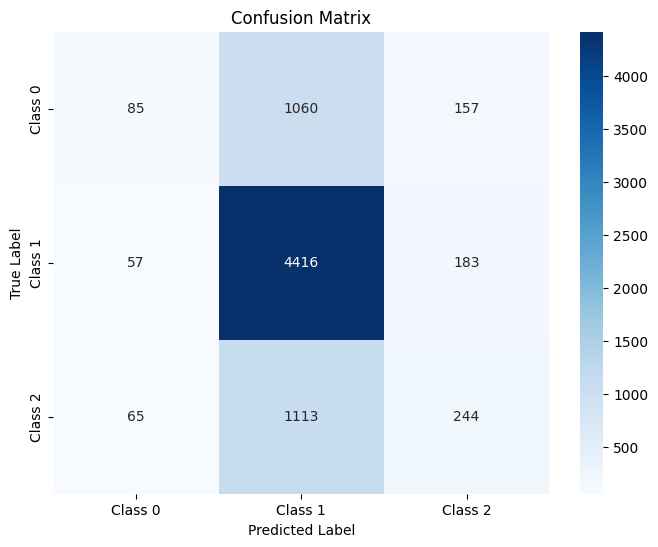

In [74]:
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm)

# Nếu bạn có tên nhãn lớp, ví dụ:
class_names = ['Class 0', 'Class 1', 'Class 2']

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [75]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_lgbm))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.07      0.11      1302
           1       0.67      0.95      0.79      4656
           2       0.42      0.17      0.24      1422

    accuracy                           0.64      7380
   macro avg       0.50      0.40      0.38      7380
weighted avg       0.58      0.64      0.56      7380



In [ ]:
def objective_CatBoost(trial):
    params = {
        "iterations": 1000,
        "depth": trial.suggest_int("depth", 5, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.15),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.2, 1.0),
        "random_strength": trial.suggest_float("random_strength", 0.2, 1.0),
        "border_count": trial.suggest_int("border_count", 64, 128),
        "task_type": "GPU",  # or "GPU" if available
        "verbose": 0,
        "loss_function": "MultiClass",
        "eval_metric": "MultiClass",
        "random_seed": 42
    }

    model = CatBoostClassifier(**params)

    model.fit(
        X_train_new_scaler, y_train_new,
        eval_set=(X_val_scaler, y_val),
        early_stopping_rounds=50,
        use_best_model=True,
        verbose=0
    )

    preds_proba = model.predict_proba(X_val_scaler)
    return log_loss(y_val, preds_proba)


In [85]:
study = optuna.create_study(direction="minimize")
study.optimize(objective_CatBoost, n_trials=50)

print("🎯 Best trial params:")
print(study.best_trial.params)

[I 2025-06-05 17:38:51,462] A new study created in memory with name: no-name-28411176-8b7f-4ac1-a3b7-573b073dceee
[I 2025-06-05 17:39:06,950] Trial 0 finished with value: 0.8254461811725005 and parameters: {'depth': 7, 'learning_rate': 0.07793035398027906, 'l2_leaf_reg': 6.511029285002698, 'bagging_temperature': 0.7835793710599677, 'random_strength': 0.20223624209600377, 'border_count': 64}. Best is trial 0 with value: 0.8254461811725005.
[I 2025-06-05 17:39:53,259] Trial 1 finished with value: 0.8296913097436563 and parameters: {'depth': 10, 'learning_rate': 0.05506777146020356, 'l2_leaf_reg': 6.501881111848325, 'bagging_temperature': 0.8768933411794404, 'random_strength': 0.5078096142031916, 'border_count': 64}. Best is trial 0 with value: 0.8254461811725005.
[I 2025-06-05 17:40:02,430] Trial 2 finished with value: 0.8393198175109247 and parameters: {'depth': 5, 'learning_rate': 0.06156421964744254, 'l2_leaf_reg': 1.2182633096697333, 'bagging_temperature': 0.2965082437029759, 'random

🎯 Best trial params:
{'depth': 7, 'learning_rate': 0.12729933474130783, 'l2_leaf_reg': 6.143840999264041, 'bagging_temperature': 0.4631814615219555, 'random_strength': 0.5361482250384189, 'border_count': 100}


In [ ]:
best_catBoost_params = {'depth': 7, 'learning_rate': 0.12729933474130783, 'l2_leaf_reg': 6.143840999264041, 'bagging_temperature': 0.4631814615219555, 'random_strength': 0.5361482250384189, 'border_count': 100}

In [ ]:
catBoost_model = CatBoostClassifier(
    task_type = "GPU",  # or "GPU" if available
    verbose = 0,
    loss_function = "MultiClass",
    eval_metric = "MultiClass",
    random_seed = 42,
    **best_catBoost_params
)

In [ ]:
catBoost_model.fit(X_train_with_sa_scaled, y_train)

In [ ]:
y_pred_catboost = catBoost_model.predict(X_test_with_sa_scaled)

In [90]:
print("🎯 Accuracy:", accuracy_score(y_test, y_pred_catboost))

🎯 Accuracy: 0.6303523035230353


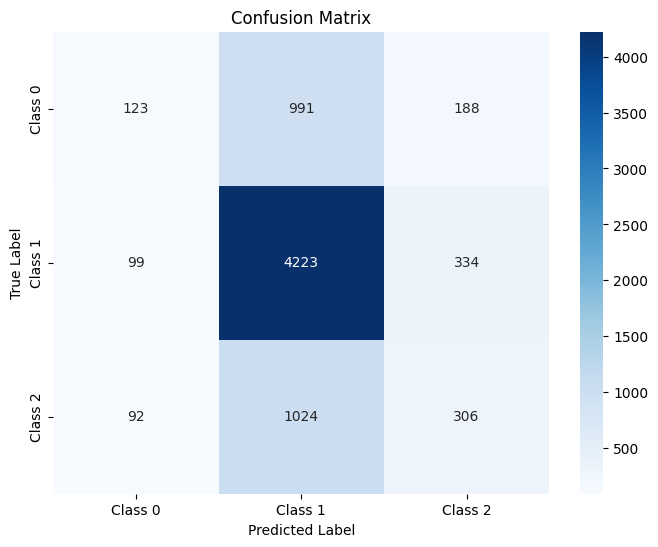

In [91]:
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred_catboost)

# Nếu bạn có tên nhãn lớp, ví dụ:
class_names = ['Class 0', 'Class 1', 'Class 2']

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [92]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_catboost))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.09      0.15      1302
           1       0.68      0.91      0.78      4656
           2       0.37      0.22      0.27      1422

    accuracy                           0.63      7380
   macro avg       0.48      0.41      0.40      7380
weighted avg       0.57      0.63      0.57      7380



In [ ]:
# =====================================final compare===========================================

In [30]:
best_hyperparameter_xgboot = {'max_depth': 9, 'learning_rate': 0.011632016671032095, 'subsample': 0.6860718729142917, 'colsample_bytree': 0.5959797122704581}
best_hyperparameter_lgbm = {'max_depth': 10, 'learning_rate': 0.04612517898854548, 'subsample': 0.6812467967705658, 'colsample_bytree': 0.7408542913499703, 'min_child_samples': 35, 'reg_alpha': 0.9605781376834349, 'reg_lambda': 0.9231336684438001}
best_hyperparameter_catBoost = {'depth': 7, 'learning_rate': 0.12729933474130783, 'l2_leaf_reg': 6.143840999264041, 'bagging_temperature': 0.4631814615219555, 'random_strength': 0.5361482250384189, 'border_count': 100}

In [31]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost_Bayesian_Optimization": XGBClassifier(
        n_estimators=1000,  # giữ nguyên như trong objective
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42,
        **best_hyperparameter_xgboot
    ),
    "LGBMC_Bayesian_Optimization":  LGBMClassifier(
        random_state = 42,
        objective= "multiclass",
        num_class = 3,
        metric = "multi_logloss",
        verbosity = -1,
        boosting_type = "gbdt",
        **best_hyperparameter_lgbm
    ),
    "CatBoost_Bayesian_Optimization": CatBoostClassifier(
        verbose = 0,
        loss_function = "MultiClass",
        eval_metric = "MultiClass",
        random_seed = 42,
        **best_hyperparameter_catBoost
    )

}

In [32]:
X_train_no_sa = df_global_train[ta_fa_feature_selected]
X_test_no_sa = df_global_test[ta_fa_feature_selected]
y_train = df_global_train[target]
y_test = df_global_test[target]

In [33]:
print("Đánh giá với bộ feature không có SA (chỉ ta + fa)")
scaler = StandardScaler()
X_train_no_sa_scaled = scaler.fit_transform(X_train_no_sa)
X_test_no_sa_scaled = scaler.transform(X_test_no_sa)      

model_names, f1_weighted, f1_micro, acc, auc_scores, roc_data = evaluate_models(X_train_no_sa_scaled, X_test_no_sa_scaled, y_train, y_test, models)

Đánh giá với bộ feature không có SA (chỉ ta + fa)
Random Forest CV F1 (weighted): 0.5960 ± 0.0139
Random Forest Test F1 (weighted): 0.5191
Random Forest Test F1 (micro)   : 0.6259
Random Forest Test Accuracy     : 0.6259
              precision    recall  f1-score   support

           0       0.31      0.05      0.09      1302
           1       0.64      0.96      0.77      4656
           2       0.39      0.05      0.09      1422

    accuracy                           0.63      7380
   macro avg       0.45      0.36      0.32      7380
weighted avg       0.54      0.63      0.52      7380

Random Forest ROC AUC (micro ovr): 0.7517
XGBoost CV F1 (weighted): 0.5816 ± 0.0181


[10:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5227
XGBoost Test F1 (micro)   : 0.6005
XGBoost Test Accuracy     : 0.6005
              precision    recall  f1-score   support

           0       0.25      0.05      0.08      1302
           1       0.65      0.90      0.75      4656
           2       0.27      0.12      0.17      1422

    accuracy                           0.60      7380
   macro avg       0.39      0.36      0.34      7380
weighted avg       0.51      0.60      0.52      7380

XGBoost ROC AUC (micro ovr): 0.7511
LightGBM CV F1 (weighted): 0.5750 ± 0.0166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005765 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10038
[LightGBM] [Info] Number of data points in the train set: 35928, number of used features: 40
[LightGBM] [Info] Start training from score -1.439218
[LightGBM] [Info] Start training from score -0.680370
[LightGBM] [Info] Start training from

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5140
AdaBoost Test F1 (micro)   : 0.6194
AdaBoost Test Accuracy     : 0.6194
              precision    recall  f1-score   support

           0       0.14      0.01      0.02      1302
           1       0.64      0.95      0.77      4656
           2       0.30      0.09      0.13      1422

    accuracy                           0.62      7380
   macro avg       0.36      0.35      0.31      7380
weighted avg       0.49      0.62      0.51      7380

AdaBoost ROC AUC (micro ovr): 0.7493
XGBoost_Bayesian_Optimization CV F1 (weighted): 0.5922 ± 0.0141


[10:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost_Bayesian_Optimization Test F1 (weighted): 0.5209
XGBoost_Bayesian_Optimization Test F1 (micro)   : 0.6260
XGBoost_Bayesian_Optimization Test Accuracy     : 0.6260
              precision    recall  f1-score   support

           0       0.44      0.03      0.05      1302
           1       0.64      0.96      0.77      4656
           2       0.35      0.09      0.14      1422

    accuracy                           0.63      7380
   macro avg       0.48      0.36      0.32      7380
weighted avg       0.55      0.63      0.52      7380

XGBoost_Bayesian_Optimization ROC AUC (micro ovr): 0.7653
LGBMC_Bayesian_Optimization CV F1 (weighted): 0.5510 ± 0.0154
LGBMC_Bayesian_Optimization Test F1 (weighted): 0.5252
LGBMC_Bayesian_Optimization Test F1 (micro)   : 0.6264
LGBMC_Bayesian_Optimization Test Accuracy     : 0.6264
              precision    recall  f1-score   support

           0       0.35      0.04      0.07      1302
           1       0.64      0.96      0.77      4656


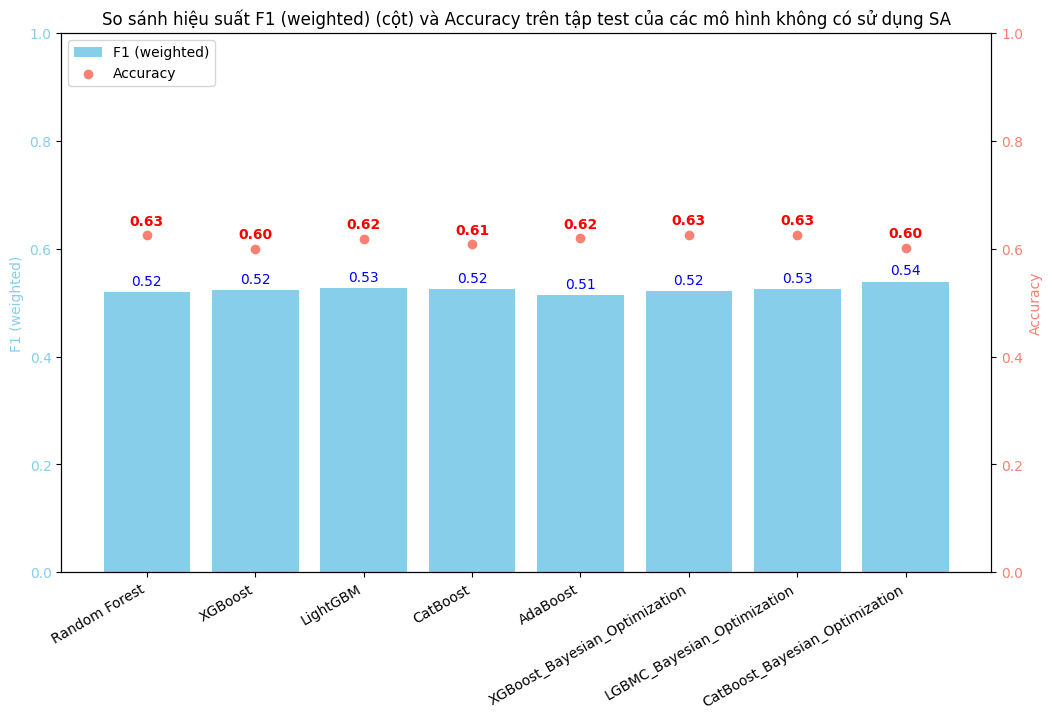

In [34]:
x = np.arange(len(model_names))  # vị trí trục x

fig, ax1 = plt.subplots(figsize=(12, 7))

# Vẽ biểu đồ cột cho F1
bars = ax1.bar(x, f1_weighted, color='skyblue', label='F1 (weighted)')
ax1.set_ylabel('F1 (weighted)', color='skyblue')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.set_xticklabels(model_names, rotation=30, ha='right')  # ⬅️ thêm rotation để xoay
ax1.tick_params(axis='y', labelcolor='skyblue')


# Tạo trục y phụ để vẽ Accuracy (nếu muốn)
ax2 = ax1.twinx()  
ax2.scatter(x, acc, color='salmon', label='Accuracy')
ax2.set_ylabel('Accuracy', color='salmon')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y', labelcolor='salmon')

# Thêm tiêu đề và legend
plt.title("So sánh hiệu suất F1 (weighted) (cột) và Accuracy trên tập test của các mô hình không có sử dụng SA")

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

# Hiển thị giá trị F1 trên cột bar
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='blue')

# Hiển thị giá trị Accuracy trên từng điểm đường line
for i, acc_value in enumerate(acc):
    ax2.annotate(f'{acc_value:.2f}',
                 xy=(x[i], acc_value),
                 xytext=(0, 5),  # dời lên trên 5 points cho rõ
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red',
                 fontsize=10,
                 fontweight='bold')

plt.show()

In [35]:
X_train_with_sa = df_global_train[features]  # features = ta + fa + sa
X_test_with_sa = df_global_test[features]
y_train = df_global_train[target]
y_test = df_global_test[target]

scaler = StandardScaler()
X_train_with_sa_scaled = scaler.fit_transform(X_train_with_sa)   # Fit scaler trên train, scale train luôn
X_test_with_sa_scaled = scaler.transform(X_test_with_sa)  

In [36]:
model_names, f1_weighted_with_sa, f1_micro_with_sa, acc_with_sa, auc_scores_with_sa, roc_data_with_sa = evaluate_models(X_train_with_sa_scaled, X_test_with_sa_scaled, y_train, y_test, models)

Random Forest CV F1 (weighted): 0.5976 ± 0.0145
Random Forest Test F1 (weighted): 0.5392
Random Forest Test F1 (micro)   : 0.6275
Random Forest Test Accuracy     : 0.6275
              precision    recall  f1-score   support

           0       0.35      0.10      0.15      1302
           1       0.65      0.94      0.77      4656
           2       0.38      0.08      0.13      1422

    accuracy                           0.63      7380
   macro avg       0.46      0.37      0.35      7380
weighted avg       0.55      0.63      0.54      7380

Random Forest ROC AUC (micro ovr): 0.7617
XGBoost CV F1 (weighted): 0.6042 ± 0.0159


[10:45:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5629
XGBoost Test F1 (micro)   : 0.6364
XGBoost Test Accuracy     : 0.6364
              precision    recall  f1-score   support

           0       0.38      0.07      0.12      1302
           1       0.67      0.93      0.78      4656
           2       0.39      0.19      0.25      1422

    accuracy                           0.64      7380
   macro avg       0.48      0.40      0.39      7380
weighted avg       0.57      0.64      0.56      7380

XGBoost ROC AUC (micro ovr): 0.7731
LightGBM CV F1 (weighted): 0.5952 ± 0.0125
LightGBM Test F1 (weighted): 0.5653
LightGBM Test F1 (micro)   : 0.6430
LightGBM Test Accuracy     : 0.6430
              precision    recall  f1-score   support

           0       0.39      0.07      0.12      1302
           1       0.67      0.94      0.78      4656
           2       0.43      0.18      0.26      1422

    accuracy                           0.64      7380
   macro avg       0.50      0.40      0.39      7380
w

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5449
AdaBoost Test F1 (micro)   : 0.6243
AdaBoost Test Accuracy     : 0.6243
              precision    recall  f1-score   support

           0       0.30      0.10      0.14      1302
           1       0.66      0.93      0.77      4656
           2       0.38      0.11      0.17      1422

    accuracy                           0.62      7380
   macro avg       0.45      0.38      0.36      7380
weighted avg       0.54      0.62      0.54      7380

AdaBoost ROC AUC (micro ovr): 0.7697
XGBoost_Bayesian_Optimization CV F1 (weighted): 0.6134 ± 0.0131


[10:50:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost_Bayesian_Optimization Test F1 (weighted): 0.5649
XGBoost_Bayesian_Optimization Test F1 (micro)   : 0.6492
XGBoost_Bayesian_Optimization Test Accuracy     : 0.6492
              precision    recall  f1-score   support

           0       0.45      0.06      0.11      1302
           1       0.67      0.96      0.79      4656
           2       0.46      0.17      0.25      1422

    accuracy                           0.65      7380
   macro avg       0.53      0.40      0.38      7380
weighted avg       0.59      0.65      0.56      7380

XGBoost_Bayesian_Optimization ROC AUC (micro ovr): 0.7886
LGBMC_Bayesian_Optimization CV F1 (weighted): 0.5761 ± 0.0135
LGBMC_Bayesian_Optimization Test F1 (weighted): 0.5623
LGBMC_Bayesian_Optimization Test F1 (micro)   : 0.6430
LGBMC_Bayesian_Optimization Test Accuracy     : 0.6430
              precision    recall  f1-score   support

           0       0.41      0.07      0.11      1302
           1       0.67      0.95      0.79      4656


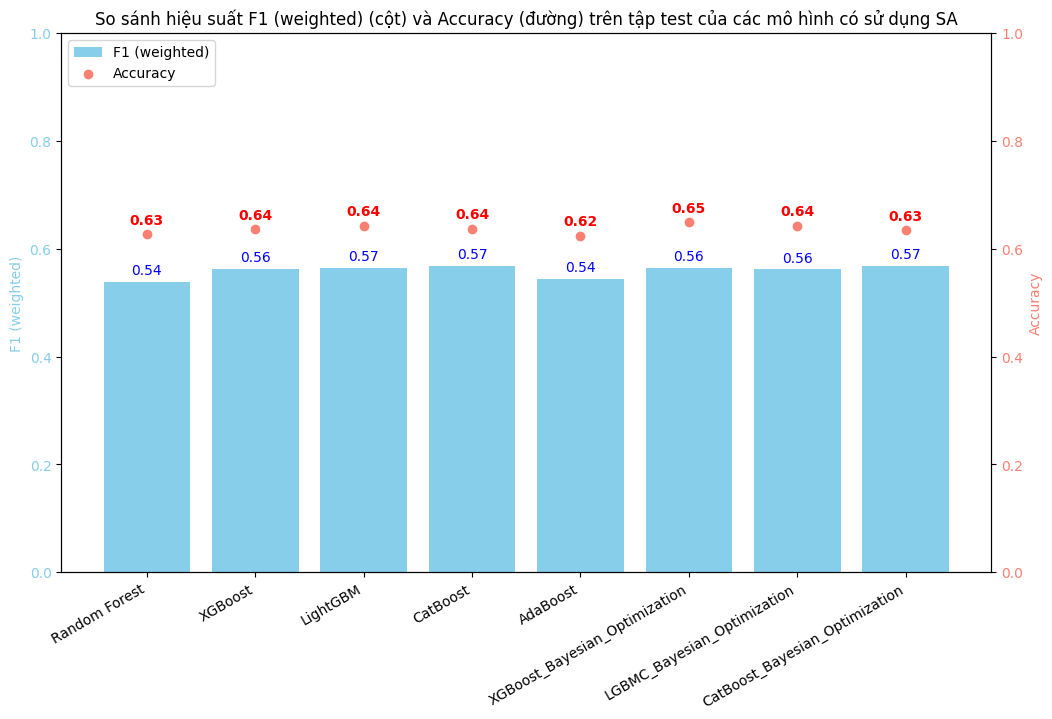

In [37]:
x = np.arange(len(model_names))  # vị trí trục x

fig, ax1 = plt.subplots(figsize=(12, 7))

# Vẽ biểu đồ cột cho F1
bars = ax1.bar(x, f1_weighted_with_sa, color='skyblue', label='F1 (weighted)')
ax1.set_ylabel('F1 (weighted)', color='skyblue')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.set_xticklabels(model_names, rotation=30, ha='right')  # ⬅️ thêm rotation để xoay
ax1.tick_params(axis='y', labelcolor='skyblue')


# Tạo trục y phụ để vẽ Accuracy (nếu muốn)
ax2 = ax1.twinx()  
ax2.scatter(x, acc_with_sa, color='salmon', label='Accuracy')
ax2.set_ylabel('Accuracy', color='salmon')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y', labelcolor='salmon')

# Thêm tiêu đề và legend
plt.title("So sánh hiệu suất F1 (weighted) (cột) và Accuracy (đường) trên tập test của các mô hình có sử dụng SA")

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

# Hiển thị giá trị F1 trên cột bar
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='blue')

# Hiển thị giá trị Accuracy trên từng điểm đường line
for i, acc_value in enumerate(acc_with_sa):
    ax2.annotate(f'{acc_value:.2f}',
                 xy=(x[i], acc_value),
                 xytext=(0, 5),  # dời lên trên 5 points cho rõ
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red',
                 fontsize=10,
                 fontweight='bold')

plt.show()

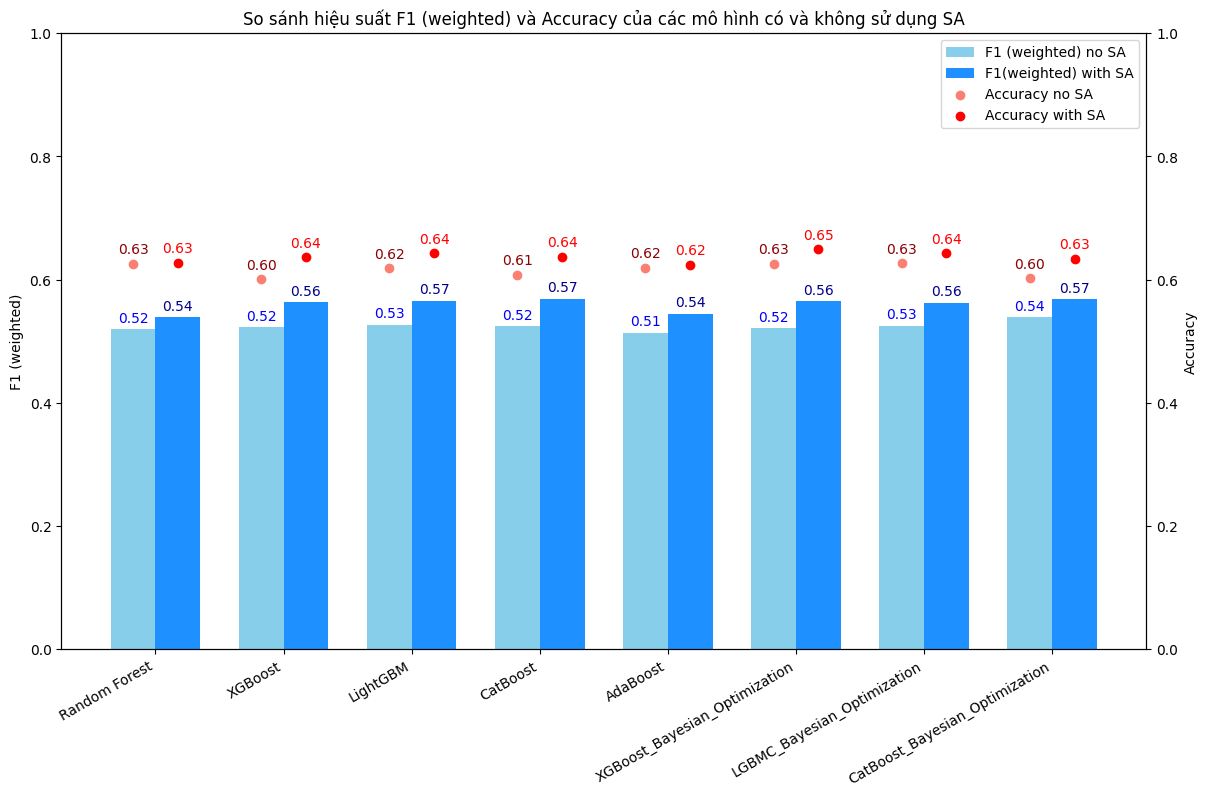

In [38]:
# Vẽ biểu đồ so sánh F1 và Accuracy giữa 2 bộ feature
x = np.arange(len(model_names))  # vị trí trục x
width = 0.35  # độ rộng cột

fig, ax1 = plt.subplots(figsize=(14, 8))

# Cột F1 no_sa và with_sa
bars1 = ax1.bar(x - width/2, f1_weighted, width, label='F1 (weighted) no SA', color='skyblue')
bars2 = ax1.bar(x + width/2, f1_weighted_with_sa, width, label='F1(weighted) with SA', color='dodgerblue')
ax1.set_ylabel('F1 (weighted)')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
ax1.set_xticklabels(model_names, rotation=30, ha='right')  # ⬅️ thêm rotation để xoay

# Trục y phụ cho Accuracy
ax2 = ax1.twinx()
line1 = ax2.scatter(x - width/2, acc, color='salmon', label='Accuracy no SA')
line2 = ax2.scatter(x + width/2, acc_with_sa, color='red', label='Accuracy with SA')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y')

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper right')

# Hiển thị giá trị trên từng cột bar và điểm line
def annotate_bars(bars, ax, color='black'):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color=color)

annotate_bars(bars1, ax1, 'blue')
annotate_bars(bars2, ax1, 'darkblue')

for i in range(len(x)):
    ax2.annotate(f'{acc[i]:.2f}',
                 xy=(x[i] - width/2, acc[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='darkred')
    ax2.annotate(f'{acc_with_sa[i]:.2f}',
                 xy=(x[i] + width/2, acc_with_sa[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red')

plt.title("So sánh hiệu suất F1 (weighted) và Accuracy của các mô hình có và không sử dụng SA")
plt.show()

In [40]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=1000,  # giữ nguyên như trong objective
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42,
        **best_hyperparameter_xgboot
    ),
    "LGBMC":  LGBMClassifier(
        random_state = 42,
        objective= "multiclass",
        num_class = 3,
        metric = "multi_logloss",
        verbosity = -1,
        boosting_type = "gbdt",
        **best_hyperparameter_lgbm
    ),
    "CatBoost": CatBoostClassifier(
        verbose = 0,
        loss_function = "MultiClass",
        eval_metric = "MultiClass",
        random_seed = 42,
        **best_hyperparameter_catBoost
    )

}

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
[16:37:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



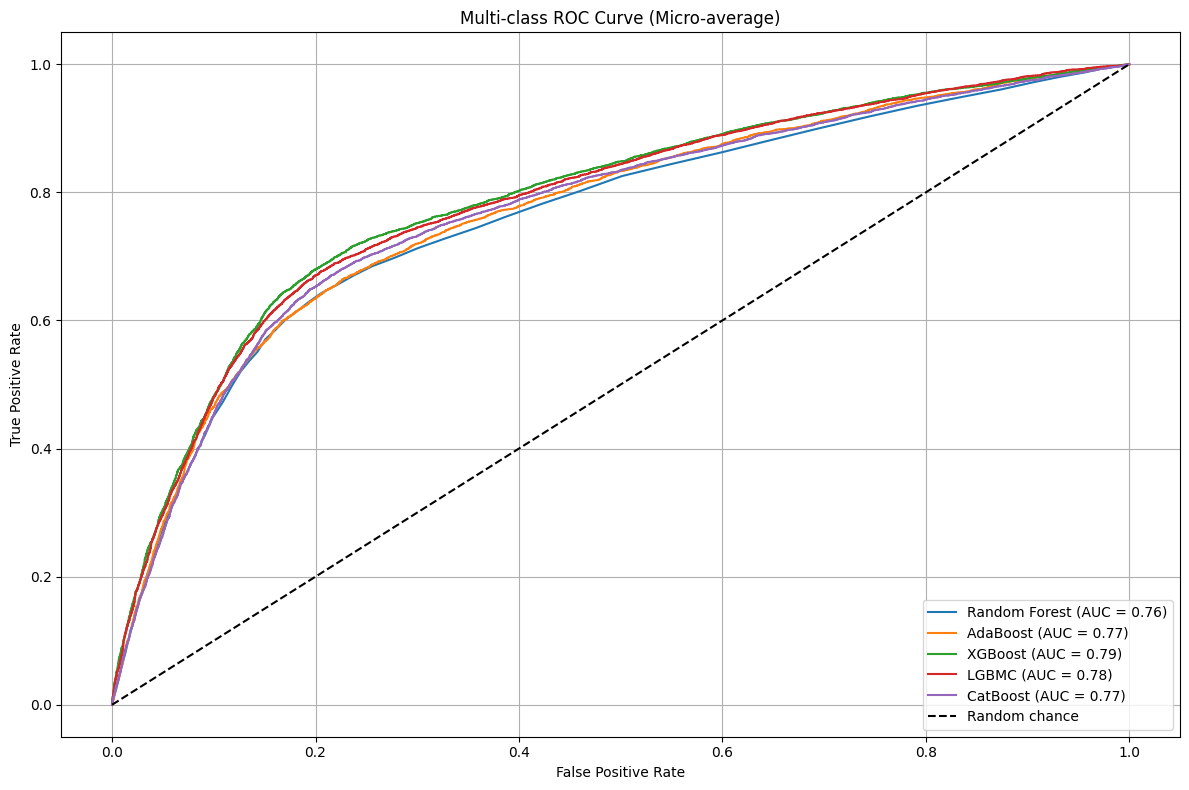

Random Forest: AUC (micro) = 0.76
AdaBoost: AUC (micro) = 0.77
XGBoost: AUC (micro) = 0.79
LGBMC: AUC (micro) = 0.78
CatBoost: AUC (micro) = 0.77


In [41]:
# One-hot encode Y_test
classes = np.unique(y_test)
Y_test_bin = label_binarize(y_test, classes=classes)
n_classes = Y_test_bin.shape[1]

# Khởi tạo dict lưu trữ AUC và mô hình
roc_auc_micro = {}

plt.figure(figsize=(12, 8))

# Duyệt qua các mô hình
for name, model in models.items():
    # Train model
    model.fit(X_train_with_sa_scaled, y_train)
    
    # Dự đoán xác suất
    y_score = model.predict_proba(X_test_with_sa_scaled)

    # Tính ROC micro
    fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), np.array(y_score).ravel())
    auc_score = auc(fpr, tpr)
    roc_auc_micro[name] = auc_score

    # Vẽ đường ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Vẽ đường baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

# Biểu đồ
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (Micro-average)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# In kết quả AUC micro
for model_name, auc_score in roc_auc_micro.items():
    print(f"{model_name}: AUC (micro) = {auc_score:.2f}")

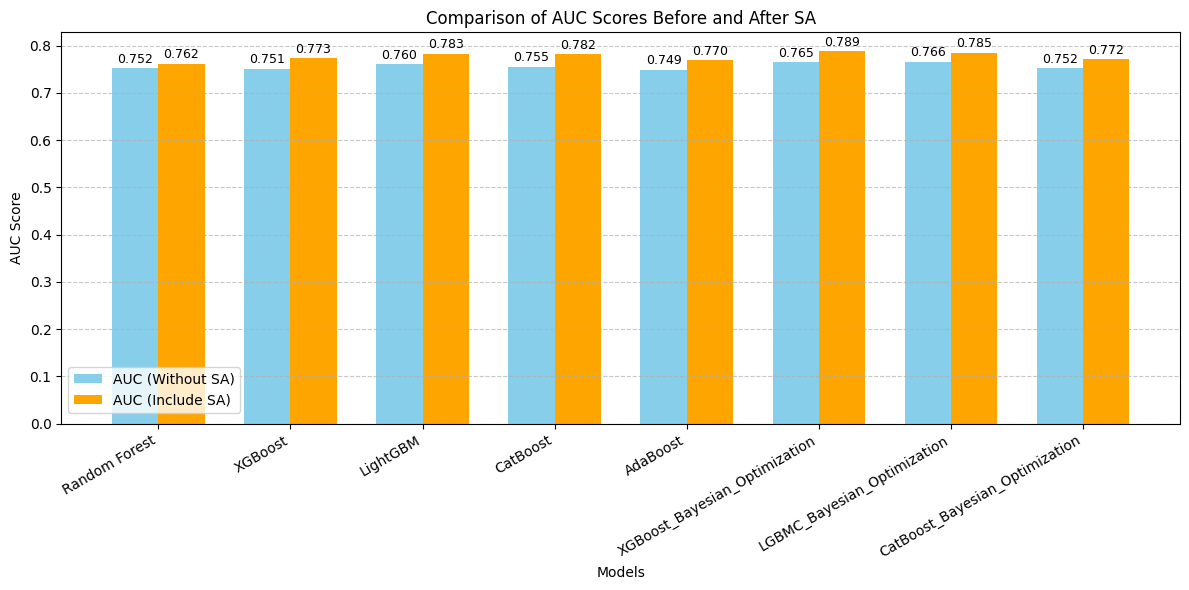

In [40]:
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(12, 6))

# Vẽ biểu đồ cột
bars1 = plt.bar(x - width/2, auc_scores, width, label='AUC (Without SA)', color='skyblue')
bars2 = plt.bar(x + width/2, auc_scores_with_sa, width, label='AUC (Include SA)', color='orange')

# Hiển thị giá trị trên đầu mỗi cột
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.3f}', 
             ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.3f}', 
             ha='center', va='bottom', fontsize=9)

# Cấu hình trục x
plt.xticks(ticks=x, labels=model_names, rotation=30, ha='right')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('Comparison of AUC Scores Before and After SA')
plt.legend(loc='lower left', bbox_to_anchor=(0, 0.01))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()